# Egypt Houses Price. 

in this dataset we will predict the price of propyrty in egypt using regression models

In [1]:
#Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': [15, 9]}, font_scale=1.3)

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


### 1- Import The Dataset

In [3]:
df = pd.read_csv('/kaggle/input/egypt-houses-price/Egypt_Houses_Price.csv')

In [4]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


### 2- Dealing With Null And Duplicated Raws

In [6]:
df['Area'] = df['Area'].replace('Unknown', np.nan)
df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)
df['Price'] = df['Price'].replace('Unknown', np.nan)
#changing Unkhowing data to NAN 

In [7]:
df.isnull().sum()

Type                0
Price              39
Bedrooms          239
Bathrooms         207
Area              507
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [8]:
df.dropna(inplace=True)
#we can delete the Null bc its not too much

In [9]:
df.duplicated().sum()

1550

In [10]:
df.drop_duplicates(inplace=True)

# Processing Data

### 3- Fixing the Dtype for the columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25143 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            25143 non-null  object
 1   Price           25143 non-null  object
 2   Bedrooms        25143 non-null  object
 3   Bathrooms       25143 non-null  object
 4   Area            25143 non-null  object
 5   Furnished       25143 non-null  object
 6   Level           25143 non-null  object
 7   Compound        25143 non-null  object
 8   Payment_Option  25143 non-null  object
 9   Delivery_Date   25143 non-null  object
 10  Delivery_Term   25143 non-null  object
 11  City            25143 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [12]:
df['Bedrooms'] = df['Bedrooms'].replace('10+',11)
df['Bathrooms'] = df['Bathrooms'].replace('10+',11)

In [13]:
df['Bedrooms'] = df['Bedrooms'].astype(float).astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(float).astype(int)
df['Area'] = df['Area'].astype(float).astype(int)
df['Price'] = df['Price'].astype(int)

In [14]:
print(df['Type'].unique())
print(df['Level'].unique())

['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House' 'Stand Alone Villa' 'Twin House']
['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']


### from inspeting the data we can confirm :
- that ( Duplex , Apartment , Studio ) type can be in different level 
- that ( Twin house , Town House , Stand Alone Villa ,Chalet ) type only on Ground level
- that ( Penthouse ) type is on Highest only

### because the Type of property we will change the level from int to str 
- Ground = 0
- 10+ = 11
- Highest = 12

In [15]:
# we can delete all unknowing level data that have ( Duplex , Apartment , Studio ) property type 
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Duplex')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Apartment')].index)
df=df.drop(df[(df['Level']=='Unknown')&(df['Type']=='Studio')].index)

In [16]:
df.loc[(df['Level']=='10+'),'Level'] = 11
df.loc[(df['Level']=='Highest'),'Level'] = 12
df.loc[(df['Level']=='Ground'),'Level'] = 0

In [17]:
df.loc[(df['Type']=='Penthouse')|
       (df['Type']=='Standalone Villa')|
       (df['Type']=='Town House')|
       (df['Type']=='Twin house')|(df['Type']=='Stand Alone Villa')|
       (df['Type']=='Chalet')|
       (df['Type']=='Twin House'),'Level'] = 0
df.loc[(df['Type']=='Penthouse'),'Level'] = 12

In [18]:
df['Level'] = df['Level'].astype(float).astype(int)

# * Furnished Column
#### From delivery date we can Guess if the property is Furnished or not

In [19]:
df['Delivery_Date'].unique()

array(['Ready to move', '2024', 'Unknown', '2023', 'soon', '2025',
       'within 6 months', '2022', '2026', '2027'], dtype=object)

In [20]:
df[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown')]
#we can replace the Furnished data here naturally with NO bc the Delivery date is too far.

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
9,Apartment,992800,3,2,146,Unknown,3,Unknown,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
64,Apartment,1396000,3,3,179,Unknown,0,Unknown,Cash or Installment,2024,Semi Finished,6th of October
67,Apartment,1805000,2,2,105,Unknown,0,Kayan,Installment,2024,Semi Finished,Sheikh Zayed
76,Apartment,1526400,3,2,212,Unknown,2,Beit Al Watan,Installment,2023,Semi Finished,New Damietta
83,Apartment,1648000,3,3,160,Unknown,3,Midtown Condo,Cash or Installment,2023,Core & Shell,New Capital City
...,...,...,...,...,...,...,...,...,...,...,...,...
27242,Town House,7100000,5,4,285,Unknown,0,Lake West,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27247,Town House,300000,4,4,220,Unknown,0,Mountain View 2,Cash or Installment,2025,Not Finished,New Cairo - El Tagamoa
27275,Twin House,4500000,3,2,200,Unknown,0,The Crown,Cash or Installment,soon,Semi Finished,Sheikh Zayed
27276,Twin House,4900000,4,3,317,Unknown,0,The Crown,Cash or Installment,soon,Unknown,Sheikh Zayed


In [21]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Date']!='Ready to move')&(df['Delivery_Date']!='Unknown'),'Furnished'] = 'No'

In [22]:
df['Delivery_Term'].unique()

array(['Finished', 'Semi Finished', 'Core & Shell', 'Unknown ',
       'Not Finished'], dtype=object)

In [23]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown ')]
#we can replace the Furnished data here naturally with NO bc the Delivery Term is not finished yet

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
8,Apartment,1560000,3,3,200,Unknown,0,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
19,Duplex,1100000,3,2,165,Unknown,0,Unknown,Installment,Unknown,Semi Finished,New Damietta
86,Apartment,1613800,3,3,182,Unknown,1,Unknown,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
95,Apartment,2520000,3,2,145,Unknown,1,The Address East,Unknown Payment,Unknown,Semi Finished,New Cairo - El Tagamoa
102,Apartment,370000,3,2,130,Unknown,3,Unknown,Cash or Installment,Ready to move,Not Finished,Dar al-Salaam
...,...,...,...,...,...,...,...,...,...,...,...,...
27300,Twin House,1268000,7,7,298,Unknown,0,Palm Hills New Cairo,Unknown Payment,Ready to move,Not Finished,New Cairo - El Tagamoa
27320,Stand Alone Villa,13500000,5,5,530,Unknown,0,Villette,Cash,Ready to move,Core & Shell,New Cairo - El Tagamoa
27327,Stand Alone Villa,3750000,3,2,400,Unknown,0,Unknown,Cash,Unknown,Core & Shell,Hurghada
27341,Town House,4000000,4,4,350,Unknown,0,Unknown,Cash or Installment,Unknown,Semi Finished,New Capital City


In [24]:
df.loc[(df['Furnished']=='Unknown')&(df['Delivery_Term']!='Finished')&(df['Delivery_Term']!='Unknown '),'Furnished'] = 'No'

### Drop columns that have more than 30% of NANs

In [25]:
furnished = len(df[df['Furnished'] == 'Unknown']) / len(df)
level = len(df[df['Level'] == 'Unknown']) / len(df)
compound = len(df[df['Compound'] == 'Unknown']) / len(df)
Payment_Option = len(df[df['Payment_Option'] == 'Unknown']) / len(df)
Delivery_Date = len(df[df['Delivery_Date'] == 'Unknown']) / len(df)
Delivery_Term = len(df[df['Delivery_Term'] == 'Unknown ']) / len(df)
City = len(df[df['City'] == 'Unknown']) / len(df)

In [26]:
print('Furnished: ', furnished)
print('Level: ',level)
print('Compound: ',compound)
print('Payment_Option: ',Payment_Option)
print('Delivery_Date: ',Delivery_Date)
print('Delivery_Term: ',Delivery_Term)
print('City: ',City)

Furnished:  0.21194743130227
Level:  0.0
Compound:  0.4048984468339307
Payment_Option:  0.0
Delivery_Date:  0.3637594583831143
Delivery_Term:  0.17459179609717243
City:  0.0


In [27]:
df = df.drop('Compound',1)
df = df.drop('Delivery_Date',1)

/tmp/ipykernel_95/2522992528.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Compound',1)
/tmp/ipykernel_95/2522992528.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Delivery_Date',1)


In [28]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Duplex,4000000,3,3,400,No,7,Cash,Finished,Nasr City
1,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar
2,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha
3,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City
4,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa


In [29]:
df['Furnished'] = df['Furnished'].replace('Unknown', np.nan)
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown ', np.nan)
df.dropna(inplace=True)

In [30]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17624 entries, 0 to 17623
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            17624 non-null  object
 1   Price           17624 non-null  int64 
 2   Bedrooms        17624 non-null  int64 
 3   Bathrooms       17624 non-null  int64 
 4   Area            17624 non-null  int64 
 5   Furnished       17624 non-null  object
 6   Level           17624 non-null  int64 
 7   Payment_Option  17624 non-null  object
 8   Delivery_Term   17624 non-null  object
 9   City            17624 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.3+ MB


In [32]:
df.describe()

,Price,Bedrooms,Bathrooms,Area,Level
count,1.762400e+04,17624.000000,17624.000000,17624.000000,17624.000000
mean,4.737109e+06,3.249376,2.835111,234.529619,1.274455
std,5.755835e+06,1.160085,1.319538,162.604944,2.574008
min,3.000000e+04,1.000000,1.000000,10.000000,0.000000
25%,1.399000e+06,3.000000,2.000000,125.000000,0.000000
50%,3.000000e+06,3.000000,3.000000,180.000000,0.000000
75%,6.063862e+06,4.000000,4.000000,280.000000,2.000000
max,2.050000e+08,11.000000,11.000000,995.000000,12.000000


In [33]:
df.describe(include=['O'])

,Type,Furnished,Payment_Option,Delivery_Term,City
count,17624,17624,17624,17624,17624
unique,10,2,4,4,171
top,Apartment,No,Cash,Finished,New Cairo - El Tagamoa
freq,5941,15756,7011,10049,4265


# * Type Column

In [34]:
df['Type'].unique()
#we need to unite the unique type of data

array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [35]:
df['Type'].value_counts()

Apartment            5941
Chalet               3837
Stand Alone Villa    2781
Town House           1990
Twin House           1265
Duplex                603
Penthouse             376
Standalone Villa      362
Twin house            323
Studio                146
Name: Type, dtype: int64

In [36]:
df.loc[(df['Type']=='Standalone Villa'),'Type'] = 'Stand Alone Villa'
df.loc[(df['Type']=='Twin house'),'Type'] = 'Twin House'

In [37]:
df['Type'].value_counts()

Apartment            5941
Chalet               3837
Stand Alone Villa    3143
Town House           1990
Twin House           1588
Duplex                603
Penthouse             376
Studio                146
Name: Type, dtype: int64

# * City Column

#### Deleting Location_City that have less than 5 rows

- city with low data don't give enough help to the model it's better to drop it

In [38]:
pd.set_option('display.max_rows', 500)
df['City'].value_counts(ascending=True)

Abu Rawash                      1
Zawya al-Hamra                  1
El Max                          1
Saft El Laban                   1
Attarin                         1
Khanka                          1
Zohour District                 1
Hadayek Helwan                  1
Ard El Lewa                     1
Quesna                          1
Banha                           1
New Beni Suef                   1
Darb al-Ahmar                   1
Qasr al-Nil                     1
Tura                            1
Shatby                          1
Ramses + Ramses Extension       1
Attaka                          1
El Fostat                       1
Minya City                      1
Kafr Shukr                      1
Bella                           1
Safaga                          1
Gomrok                          1
Ataba                           1
Aga                             1
Schutz                          1
Dhahria                         1
Sadat                           1
Talkha        

In [39]:
ind = df['City'].value_counts(dropna=False).keys().tolist()
val = df['City'].value_counts(dropna=False).tolist()
value_dict = list(zip(ind, val))

In [40]:
lc_sm = []
y = 'Less'
for val,ind in value_dict:
    if ind <= 5:
        lc_sm.append(val)
    else :
        pass
def lcdlt(x):
    if x in lc_sm:
        return y
    else :
        return x

In [41]:
df['City'] = df['City'].apply(lcdlt)

In [42]:
df=df.drop(df[(df['City']=='Less')].index)

In [43]:
for i in df['City'].unique():
    print(f'"{i}"'',')

"Nasr City",
"Camp Caesar",
"Smoha",
"New Cairo - El Tagamoa",
"Sheikh Zayed",
"Shorouk City",
"Sidi Beshr",
"Gesr Al Suez",
"Mokattam",
"New Capital City",
"New Damietta",
"Zahraa Al Maadi",
"6th of October",
"Mansura",
"New Heliopolis",
"Badr City",
"Imbaba",
"Borg al-Arab",
"Mohandessin",
"Glim",
"Ain Sukhna",
"Maadi",
"Hadayek 6th of October",
"Haram",
"Madinaty",
"10th of Ramadan",
"Heliopolis",
"Rehab City",
"North Coast",
"Nakheel",
"Hadayek al-Ahram",
"Obour City",
"Hurghada",
"Agouza",
"Mandara",
"Helmeyat El Zaytoun",
"Katameya",
"Alamein",
"Miami",
"Hadayek al-Kobba",
"Mostakbal City",
"Agami",
"Ras al-Bar",
"Bolkly",
"15 May City",
"Seyouf",
"Sharq District",
"Ismailia City",
"Ain Shams",
"Shubra al-Khaimah",
"Laurent",
"Al Ibrahimiyyah",
"New Nozha",
"New Mansoura",
"Dokki",
"Sheraton",
"Faisal",
"Moharam Bik",
"Al Manial",
"Sahl Hasheesh",
"West Somid",
"Gianaclis",
"Asafra",
"Gouna",
"Zamalek",
"Zagazig",
"Shubra",
"Marsa Matrouh",
"Giza District",
"Almazah",
"San Stefan

### price depend highly with the location so we will deduct outlines for every city manuly

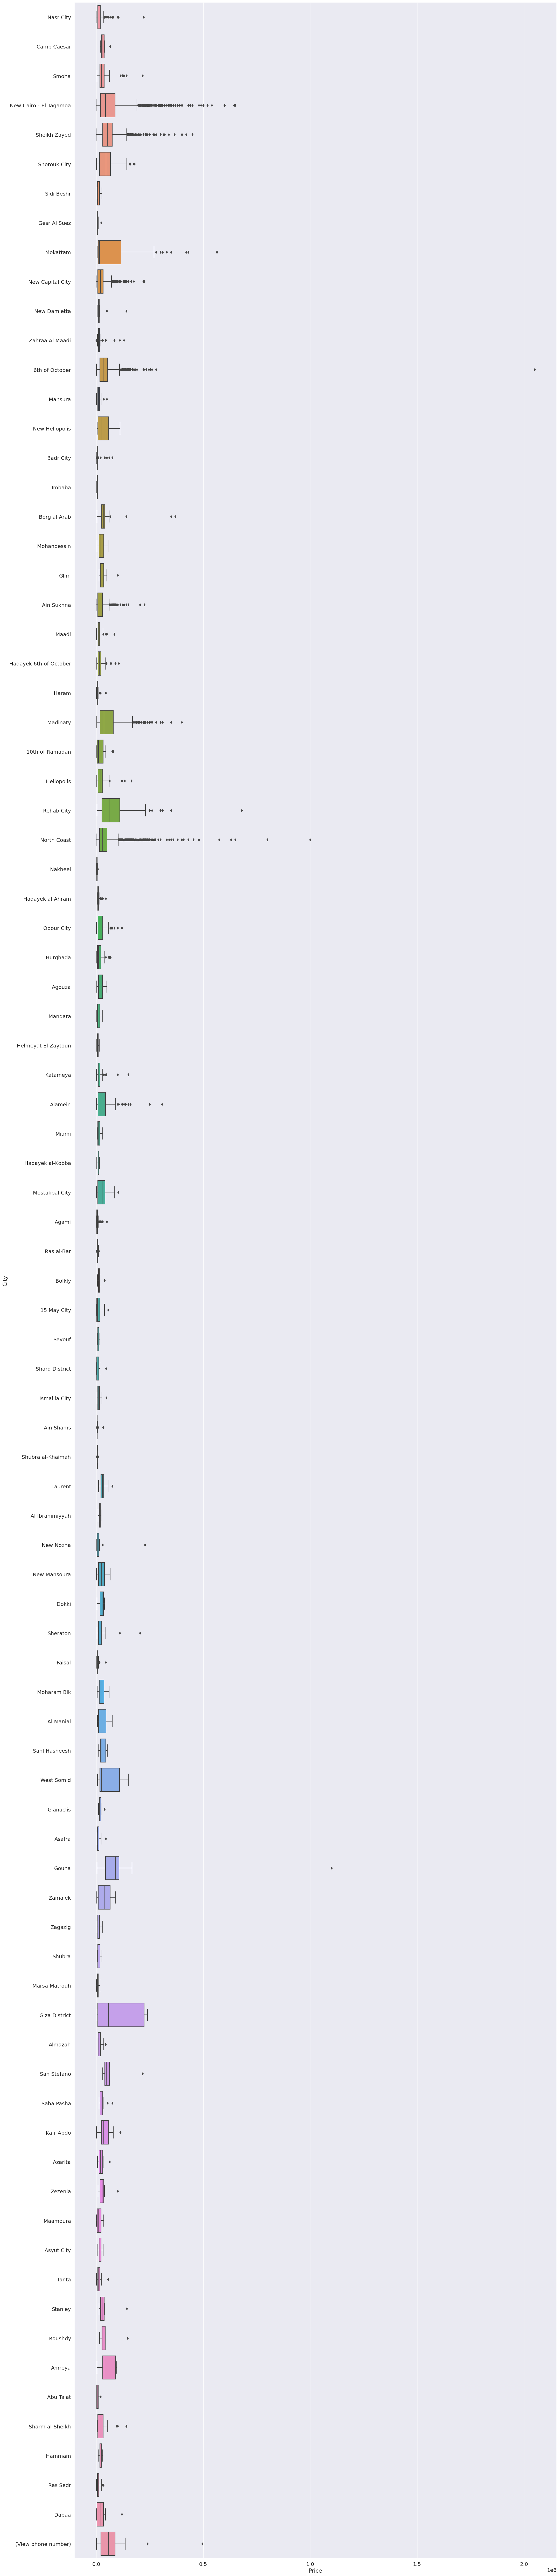

In [44]:
plt.subplots(figsize=(24, 128))
sns.boxplot(y='City', x='Price',data=df);

In [45]:
lcc = df['City'].value_counts().keys().tolist()

In [46]:
for x in lcc:
    Q1= df[(df['City']==x)]['Price'].quantile(0.25)
    Q3= df[(df['City']==x)]['Price'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.2 * IQR
    lower_bound = Q1 - 1.2 * IQR
    df=df.drop(df[(df['City']==x)&(df['Price']>=upper_bound)].index)
    df=df.drop(df[(df['City']==x)&(df['Price']<=lower_bound)].index)

In [47]:
df['City'].unique()

array(['Camp Caesar', 'Smoha', 'Nasr City', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis', 'Badr City',
       'Imbaba', 'Mohandessin', 'Glim', 'Ain Sukhna', 'Maadi',
       'Hadayek 6th of October', 'Haram', 'Madinaty', '10th of Ramadan',
       'Heliopolis', 'Rehab City', 'North Coast', 'Nakheel',
       'Hadayek al-Ahram', 'Obour City', 'Hurghada', 'Agouza', 'Mandara',
       'Helmeyat El Zaytoun', 'Katameya', 'Alamein', 'Miami',
       'Hadayek al-Kobba', 'Mostakbal City', 'Agami', 'Ras al-Bar',
       'Bolkly', '15 May City', 'Seyouf', 'Sharq District',
       'Ismailia City', 'Ain Shams', 'Shubra al-Khaimah',
       'Al Ibrahimiyyah', 'New Nozha', 'Laurent', 'New Mansoura', 'Dokki',
       'Sheraton', 'Faisal', 'Moharam Bik', 'Al Manial', 'Sahl Hasheesh',
       'West Somid', 'Asafra', 'Gouna', 'Zamalek', '

In [48]:
df=df.drop(df[df['City']=='(View phone number)'].index)

In [49]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

# * Area Column

In [50]:
df['Area'].describe()

count    16095.000000
mean       216.157999
std        140.672771
min         10.000000
25%        125.000000
50%        175.000000
75%        260.000000
max        990.000000
Name: Area, dtype: float64

In [51]:
#deleting some raws that doest make sensce like 4 rooms in 100 miters
df=df.drop(df[(df['Area']<=100)&(df['Bedrooms']>=4)].index)
df=df.drop(df[(df['Area']<=30)&(df['Type']!='Studio')].index)

In [52]:
df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')]
df=df.drop(df[(df['Area']>=300)&(df['Price']<=2000000)&(df['Payment_Option']=='Cash')&(df['Delivery_Term']=='Finished')].index)

# * Payment_Option Column


In [53]:
def Price_range(x) :
    if x <= 1000000 : 
        return 'Low Price'
    elif x <= 3000000 :
        return 'Mid Price'
    else :
        return 'high Price'

In [54]:
df['Price_range'] = df['Price'].apply(Price_range)

In [55]:
df.groupby('Price_range')['Payment_Option'].value_counts()

Price_range  Payment_Option     
Low Price    Cash or Installment    1842
             Cash                    858
             Installment             368
             Unknown Payment         120
Mid Price    Cash or Installment    2118
             Cash                   2005
             Installment            1093
             Unknown Payment         316
high Price   Cash                   3178
             Cash or Installment    2249
             Installment            1386
             Unknown Payment         525
Name: Payment_Option, dtype: int64

In [56]:
df.to_csv('cleaned.csv', index=False)

# Visualization

In [57]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

Type : 8
Apartment            5686
Chalet               3705
Stand Alone Villa    2215
Town House           1891
Twin House           1463
Duplex                587
Penthouse             366
Name: Type, dtype: int64

********************

Price : 3103
3500000    223
3000000    197
2500000    193
4500000    173
2000000    166
5000000    163
1500000    163
Name: Price, dtype: int64

********************

Bedrooms : 11
3    7362
2    3371
4    3137
5    1181
1     602
6     292
7      66
Name: Bedrooms, dtype: int64

********************

Bathrooms : 11
2    5441
3    4709
4    2444
1    2224
5     911
6     236
7      57
Name: Bathrooms, dtype: int64

********************

Area : 604
120    395
125    347
150    336
200    333
100    322
110    263
170    253
Name: Area, dtype: int64

********************

Furnished : 2
No     14508
Yes     1550
Name: Furnished, dtype: int64

********************

Level : 13
0     10520
2      1502
3      1154
1      1009
4       512
12      410
5       

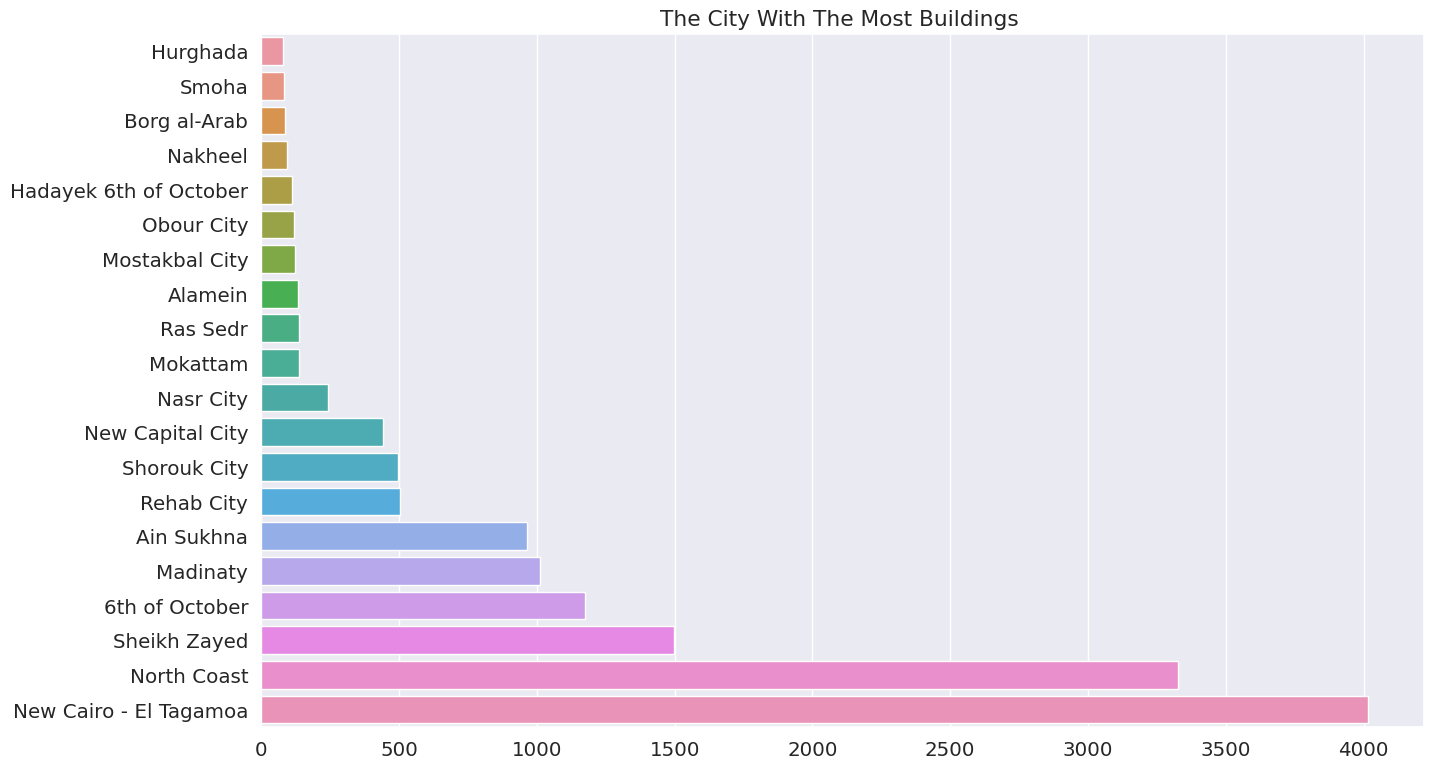

In [58]:
mp = df['City'].value_counts()[0:20].sort_values()
sns.barplot(y=mp.index,x=mp.values);
plt.title('The City With The Most Buildings ');

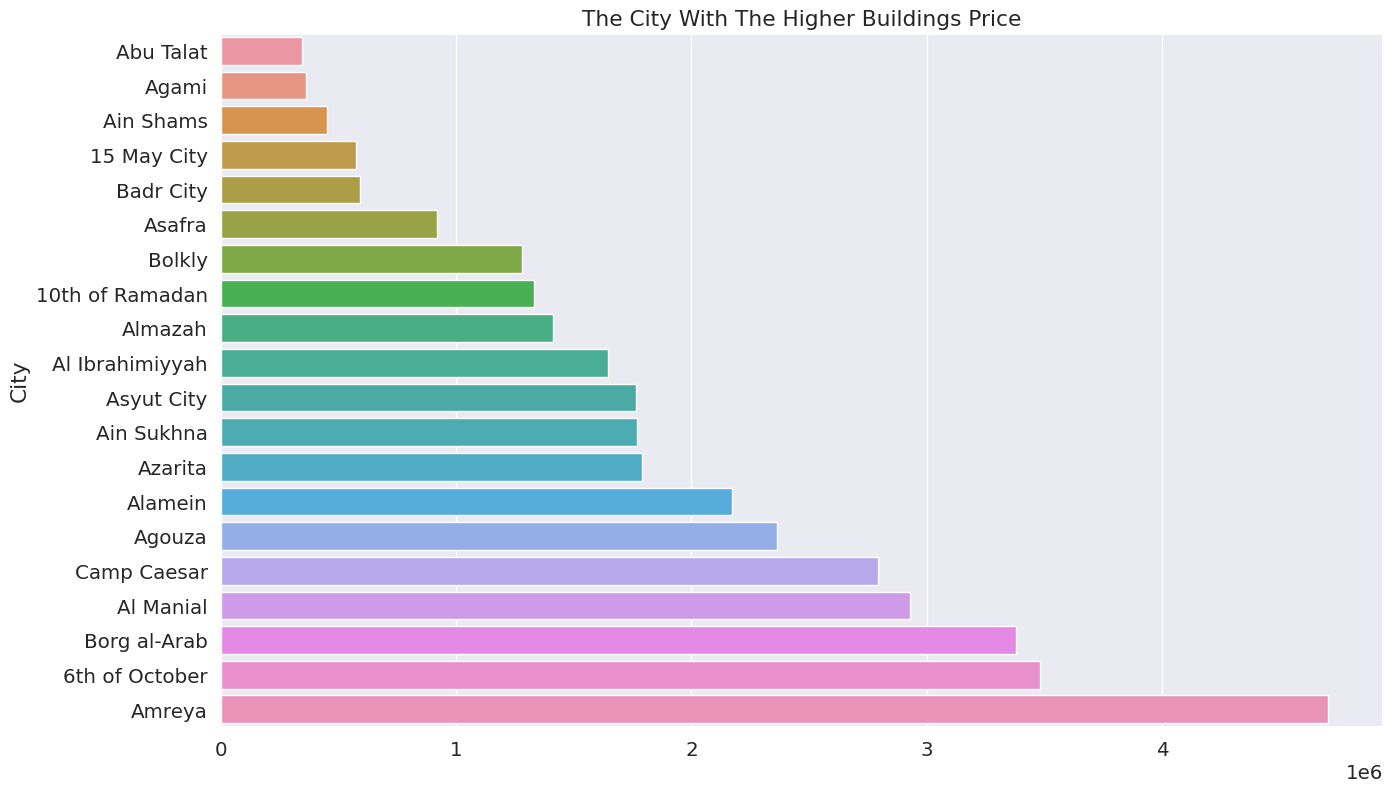

In [59]:
lpm = df.groupby('City')['Price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('The City With The Higher Buildings Price');

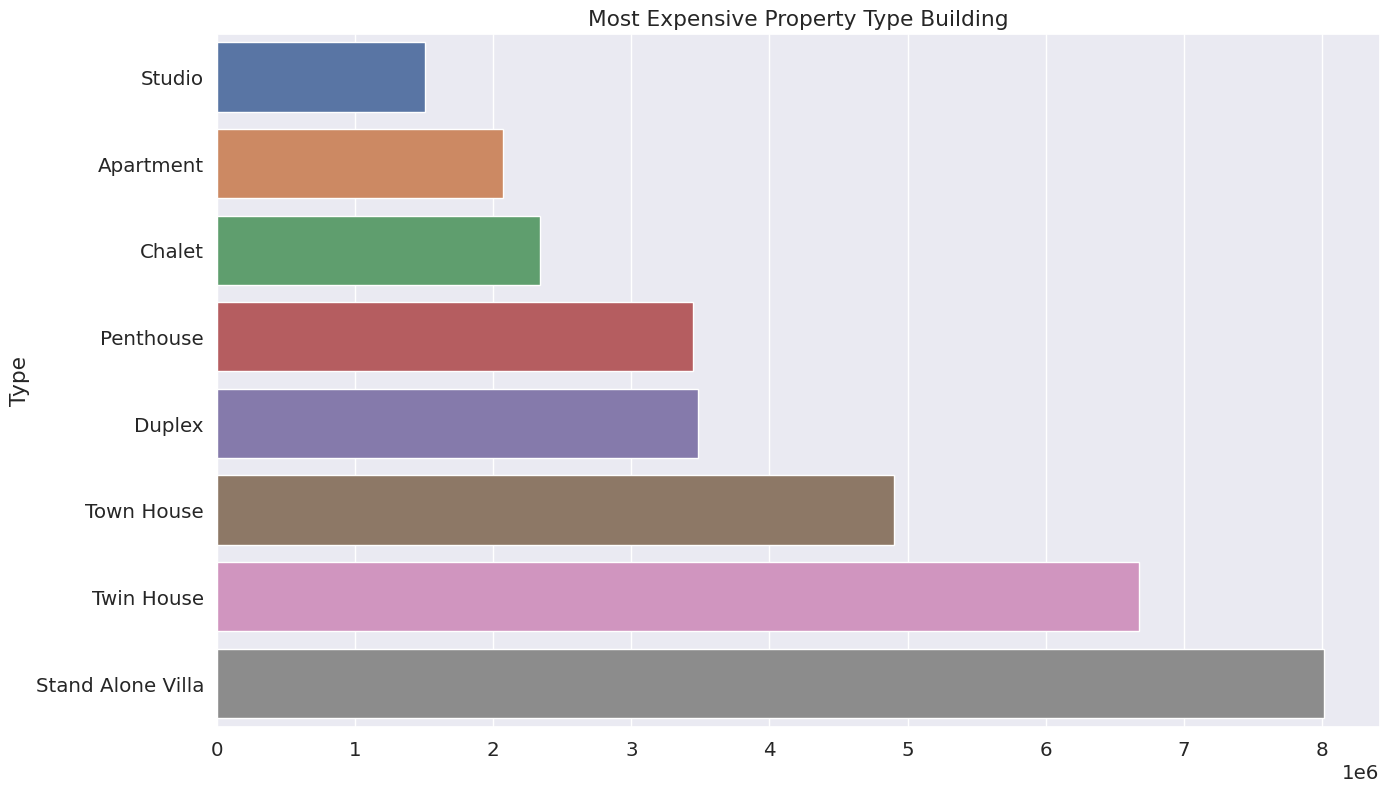

In [60]:
lpp = df.groupby('Type')['Price'].mean().sort_values()
sns.barplot(y=lpp.index,x=lpp.values);
plt.title('Most Expensive Property Type Building');

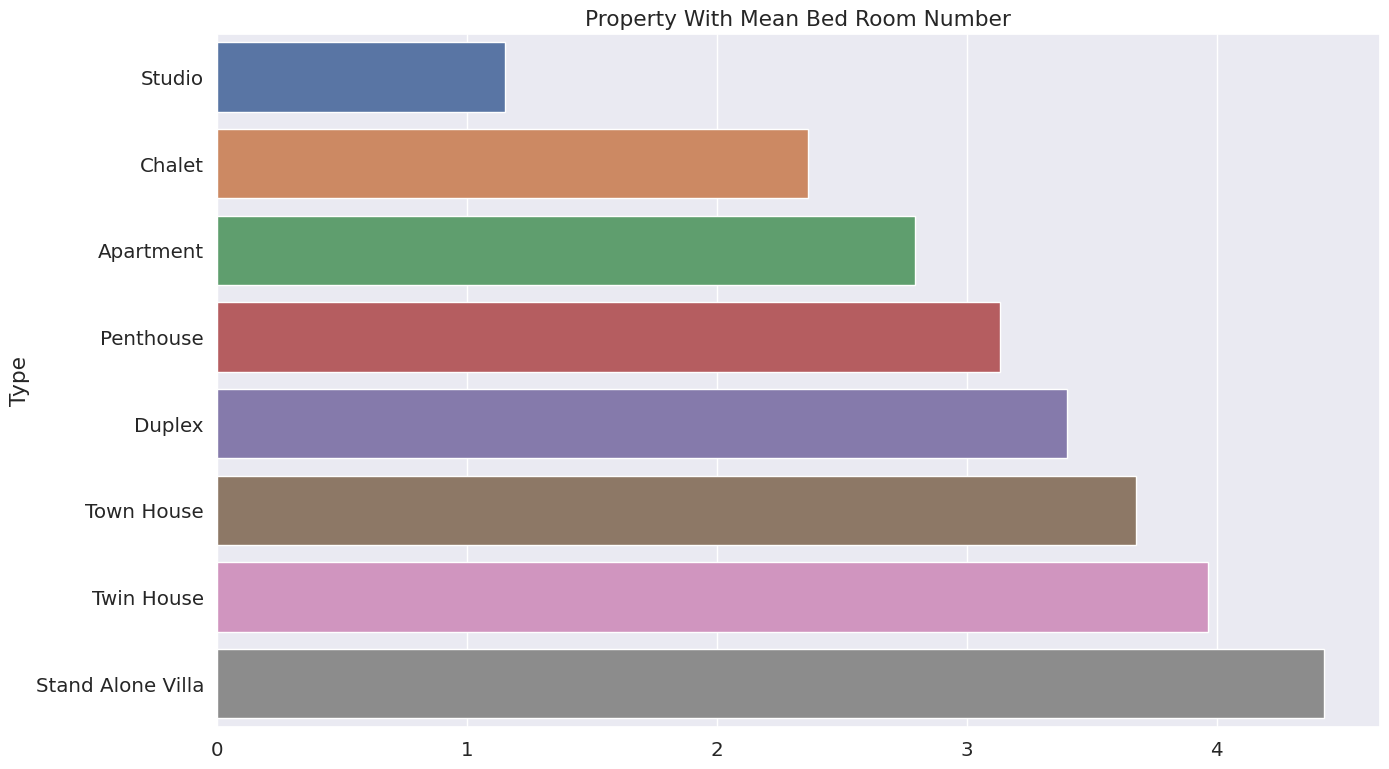

In [61]:
lpb = df.groupby('Type')['Bedrooms'].mean().sort_values()
sns.barplot(y=lpb.index,x=lpb.values);
plt.title('Property With Mean Bed Room Number');

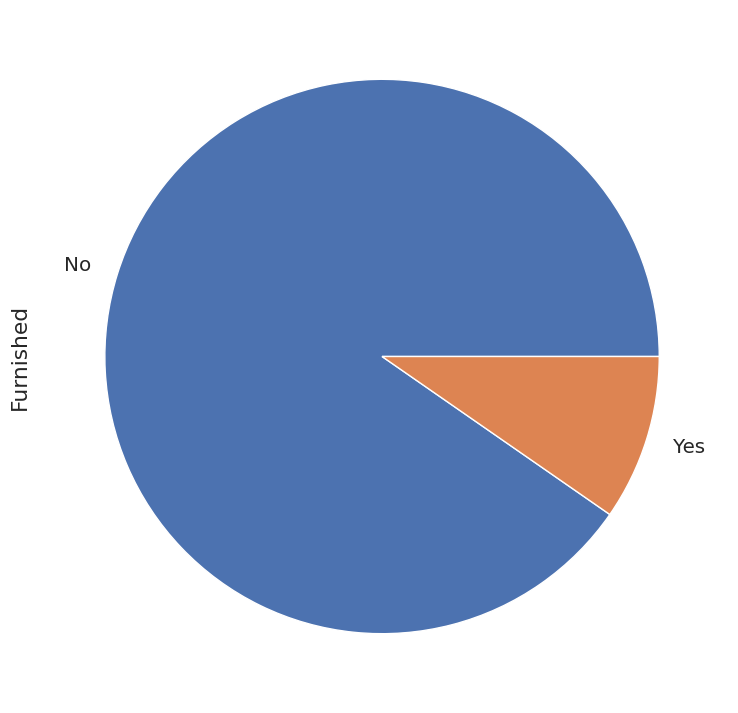

In [62]:
df['Furnished'].value_counts().plot(kind='pie');

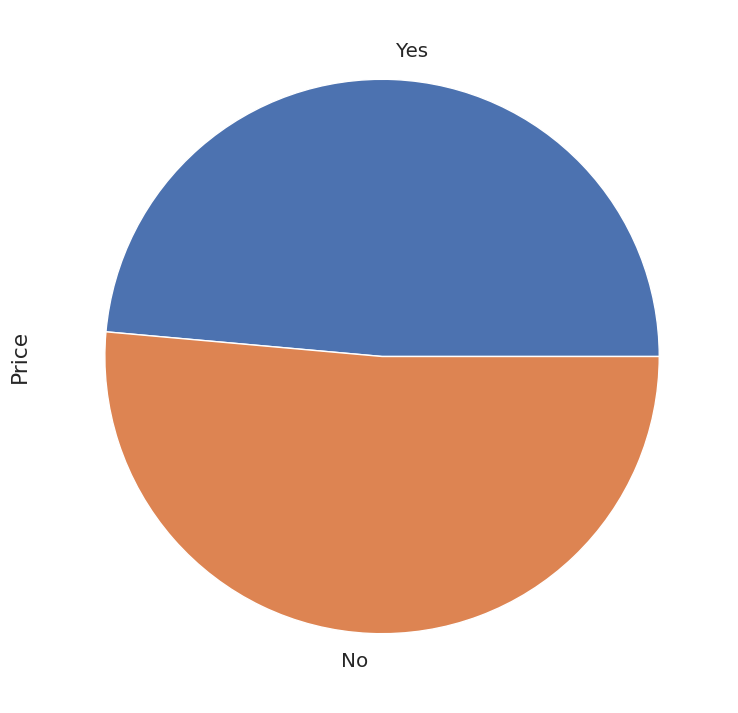

In [63]:
df.groupby('Furnished')['Price'].mean().sort_values().plot(kind='pie');

/tmp/ipykernel_95/1127486633.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);


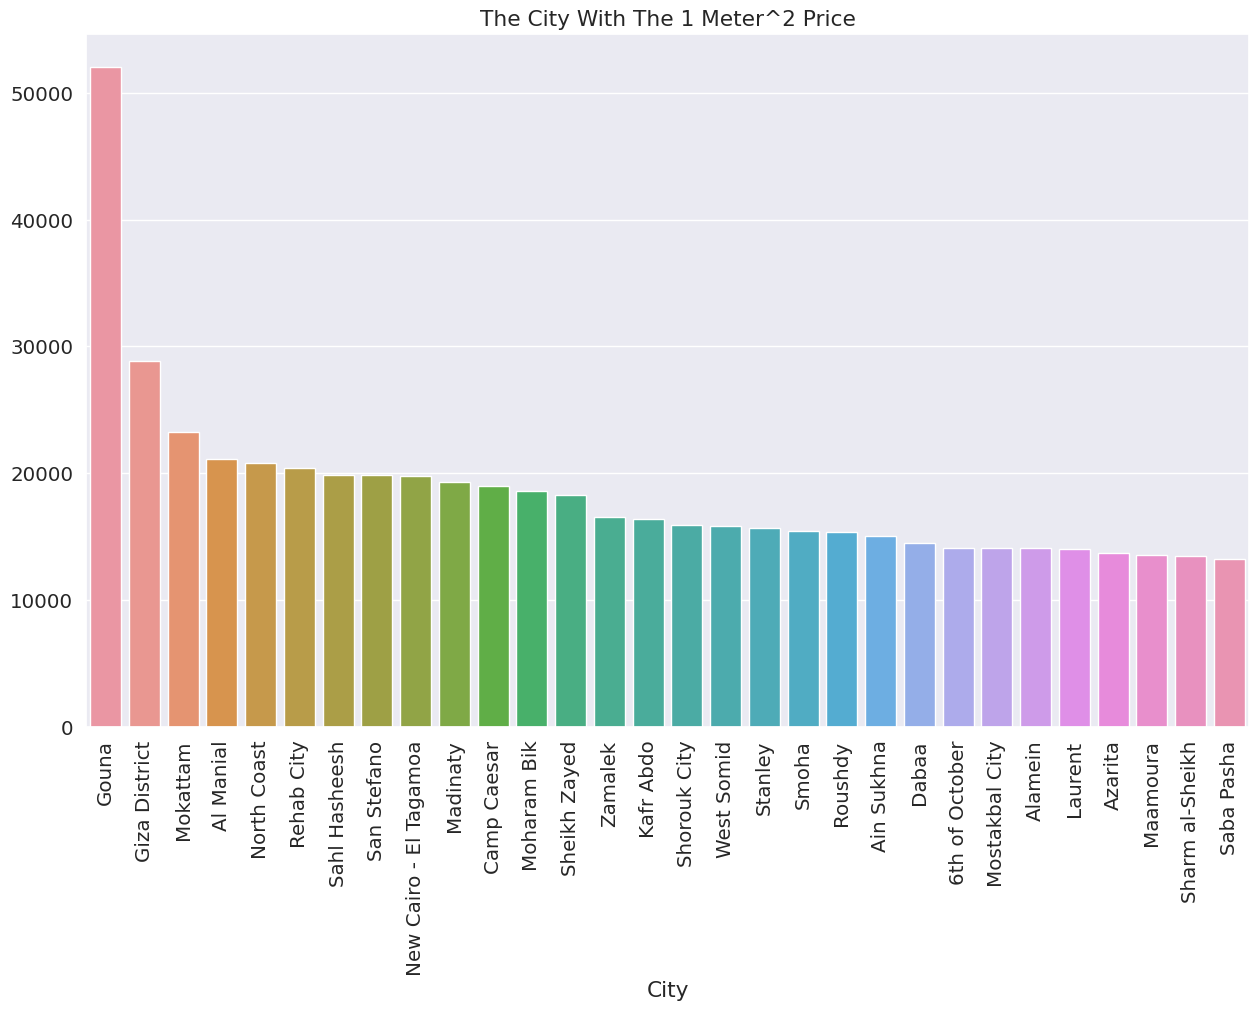

In [64]:
ind=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].index
vlu=(df.groupby('City')['Price'].sum()/df.groupby('City')['Area'].sum()).sort_values(ascending=False)[0:30].values
sns.barplot(data = df, x = ind ,y= vlu ,ci = None,order = ind);
plt.xticks(rotation=90);
plt.title('The City With The 1 Meter^2 Price');

# from Visualization we did we can say that most importal points:
- Price depend on the city highly then on space of the property.
- Furnished or Not Furnished not effect highly on Price.
- After Cairo Coastal cities the most expensive property. 

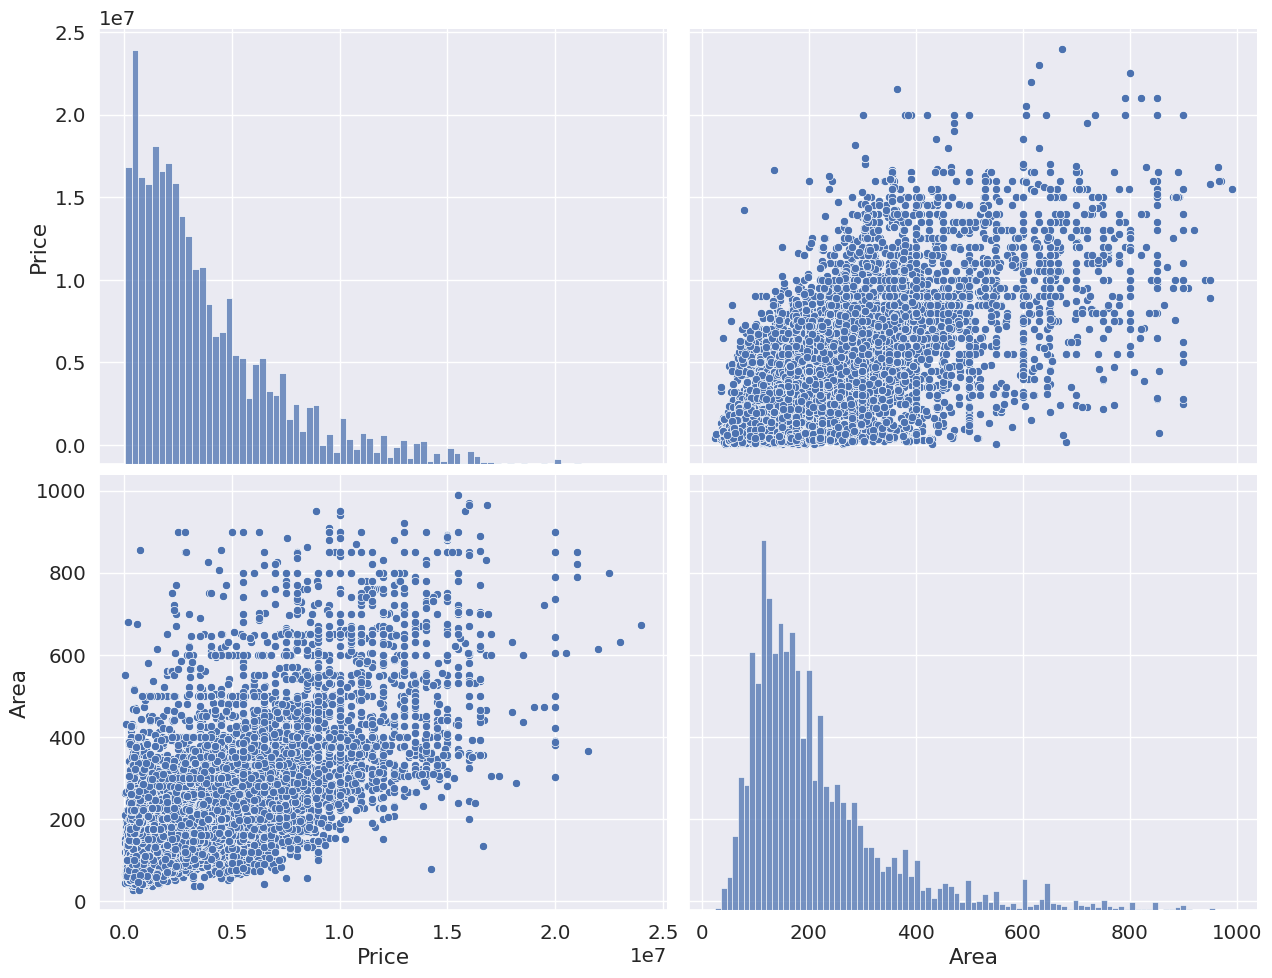

In [65]:
sns.pairplot(df, vars = ['Price', 'Area'], height=5, aspect=1.3);

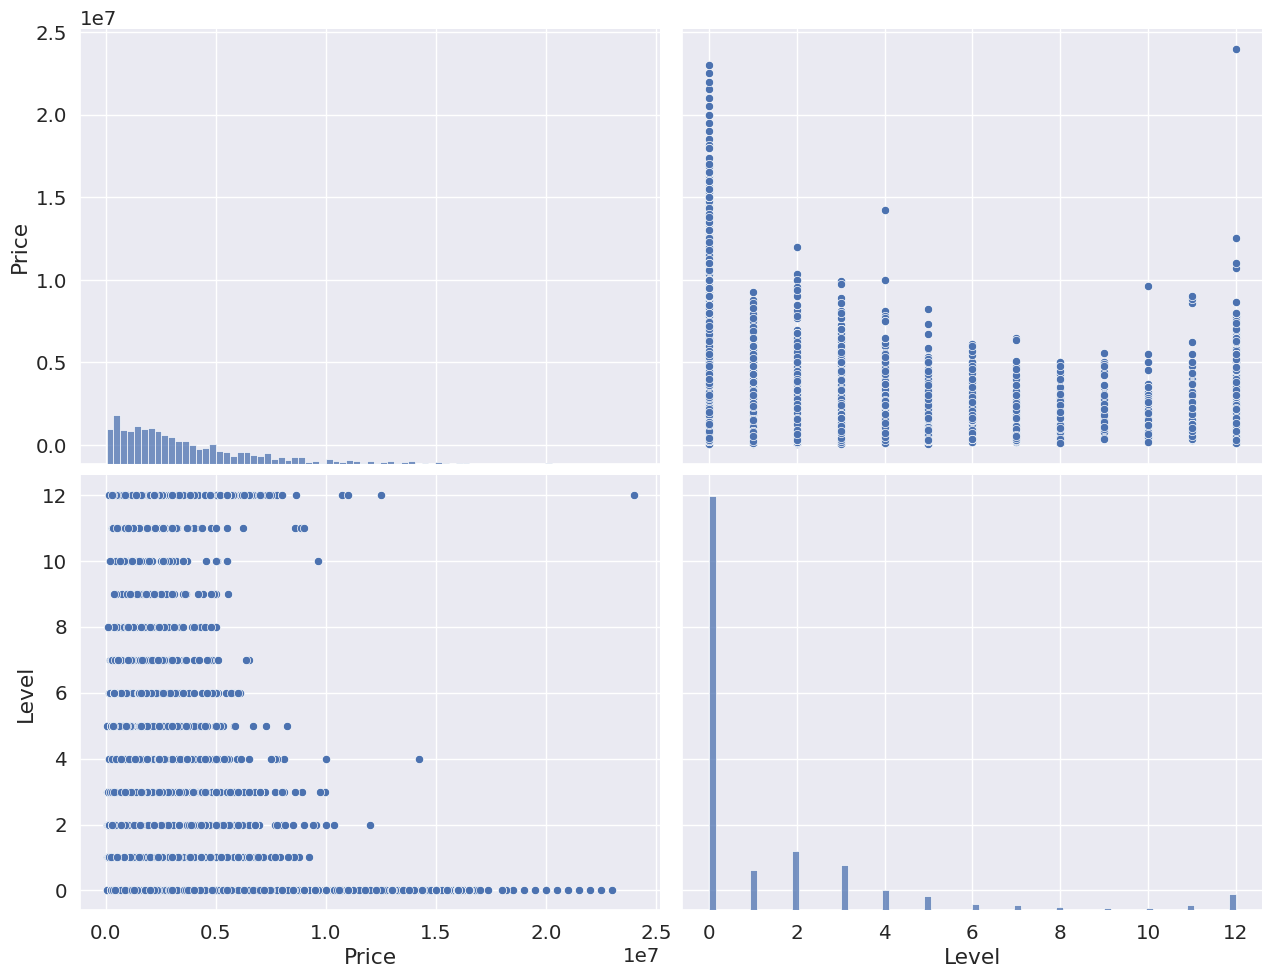

In [66]:
sns.pairplot(df, vars = ['Price', 'Level'], height=5, aspect=1.3);

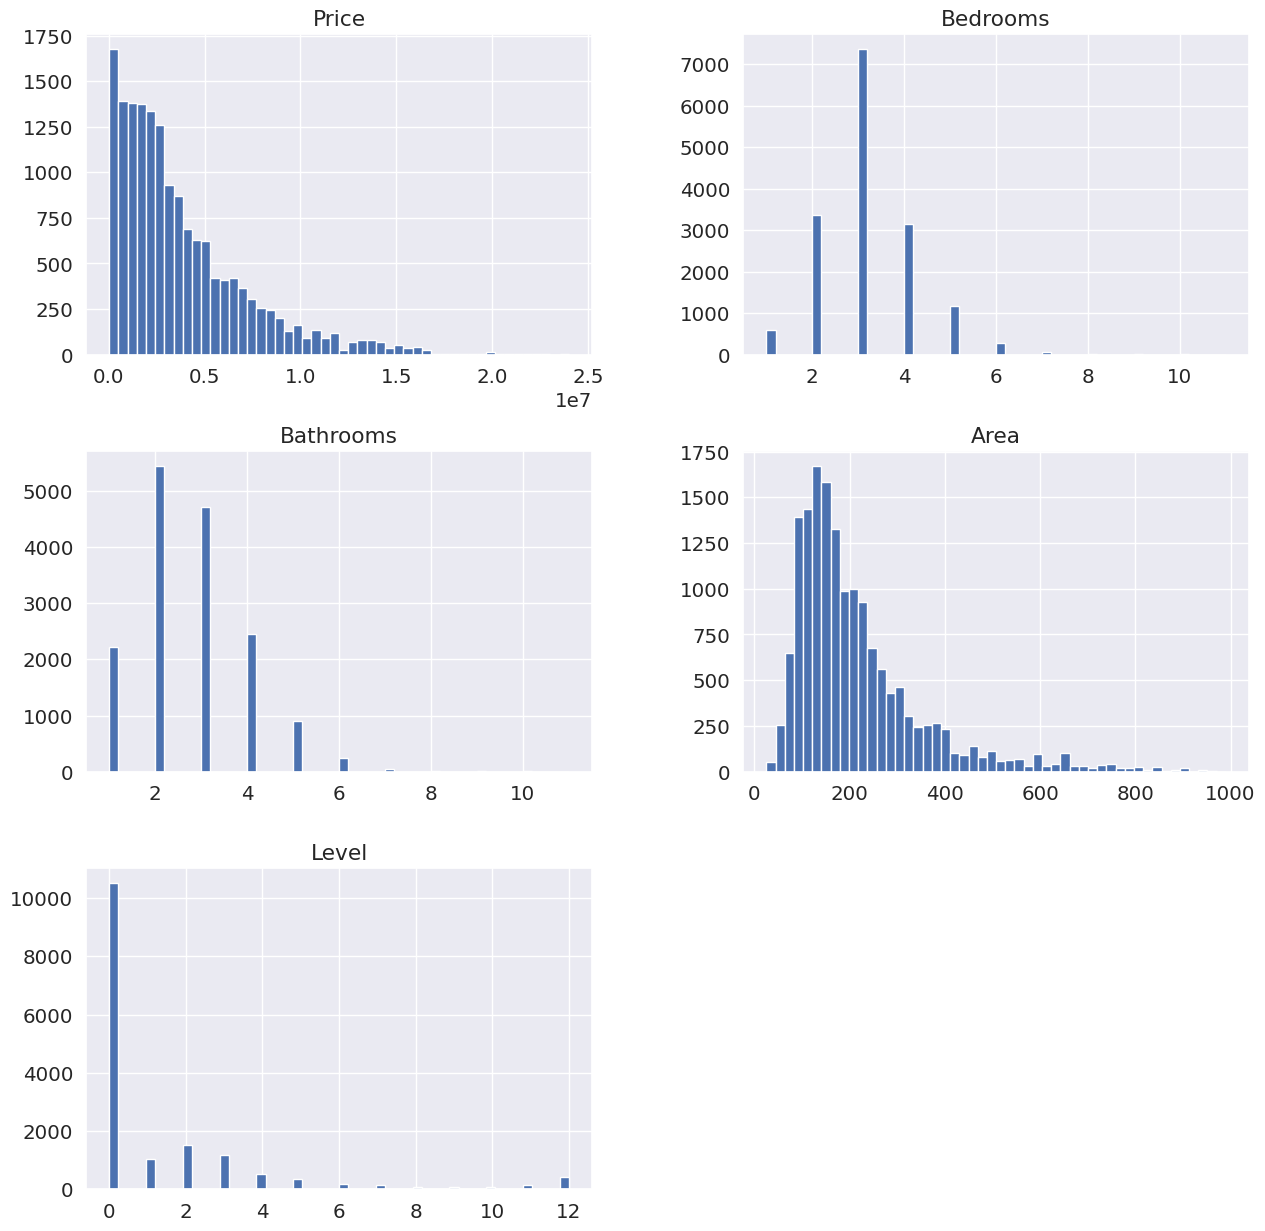

In [67]:
df.hist(bins=50, figsize=(15, 15));

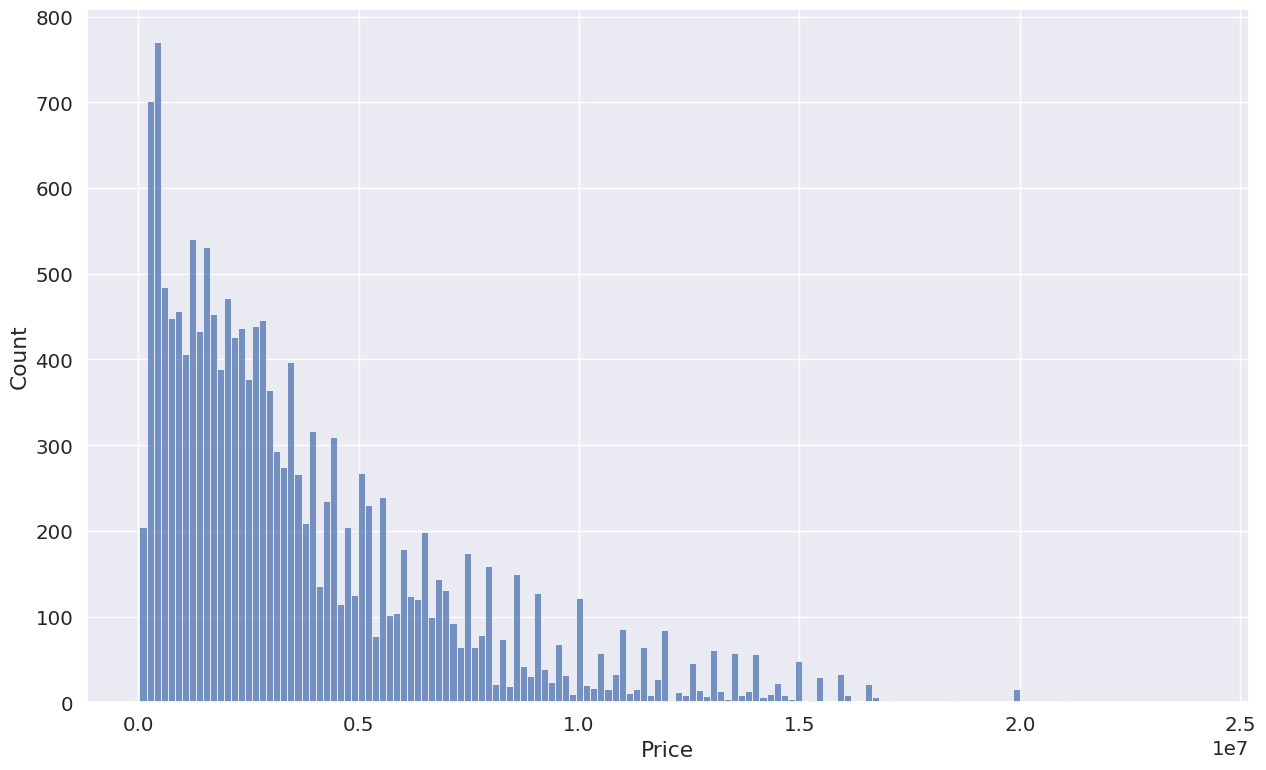

In [68]:
sns.histplot(data=df,x='Price',bins=150);

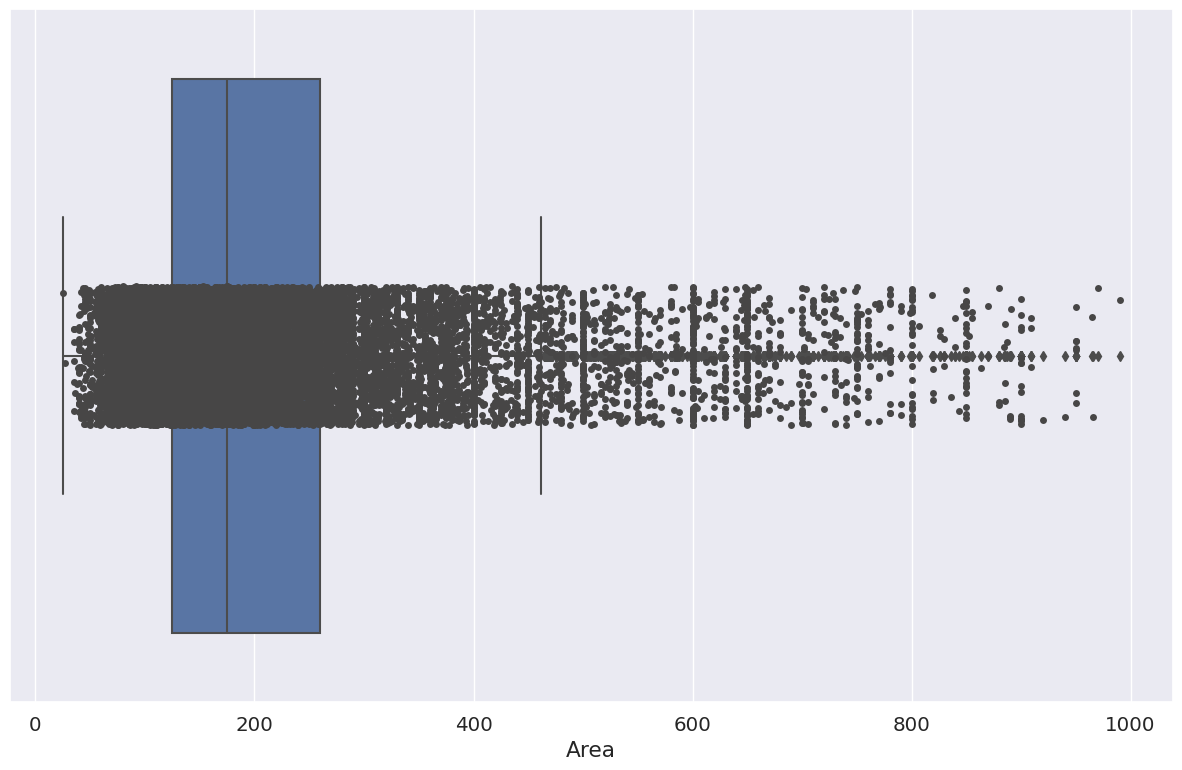

In [69]:
sns.boxplot(x='Area', data=df)
sns.stripplot(x='Area', data=df, color="#474646");

<Axes: xlabel='Area', ylabel='Count'>

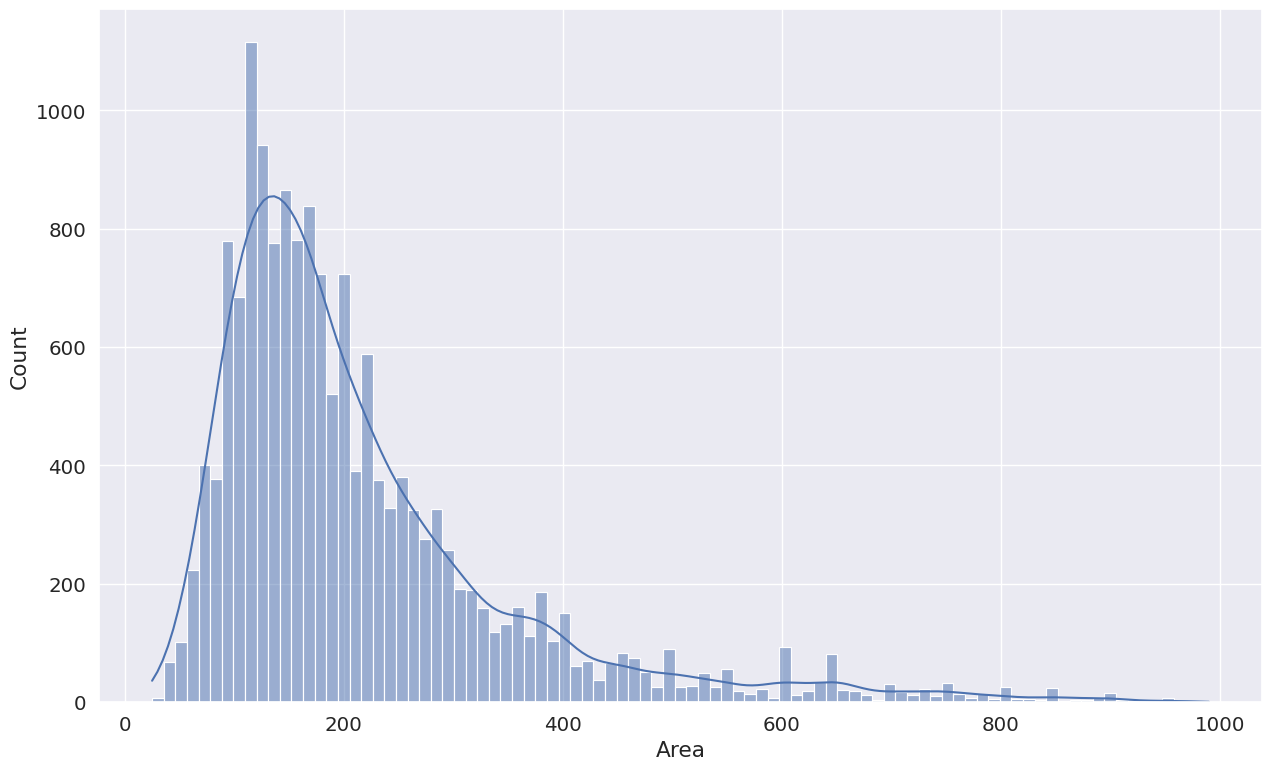

In [70]:
sns.histplot(data = df, x ='Area', kde = True)

In [71]:
df.corr()

/tmp/ipykernel_95/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Bedrooms,Bathrooms,Area,Level
Price,1.000000,0.520989,0.636456,0.685345,-0.217643
Bedrooms,0.520989,1.000000,0.797515,0.720963,-0.127501
Bathrooms,0.636456,0.797515,1.000000,0.740778,-0.203051
Area,0.685345,0.720963,0.740778,1.000000,-0.163978
Level,-0.217643,-0.127501,-0.203051,-0.163978,1.000000


In [ ]:
#df.to_csv('New_houes_data.csv')

# Building The Models

In [72]:
df = pd.get_dummies(df, columns = ['Type', 'Furnished','City' ,'Payment_Option','Delivery_Term'])
X = df.drop(columns = ['Price','Price_range'])
y = df[['Price']]

In [73]:
X.to_csv('data.csv', index=False)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True ,random_state = 404)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12043, 108), (4015, 108), (12043, 1), (4015, 1))

In [75]:
def performance(model,X_train,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    model: Regression Model. The regression model.
    x_train: numpy.ndarray. The training data in the x.
    y_train: pandas.core.series.Series. The training data in the y.
    y_pred: numpy.ndarray. The predicted data.
    y_test: pandas.core.series.Series. The actual data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [76]:
#Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

#The predicted data
lr_pred = lr.predict(X_test)

In [77]:
performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.628501263094229
Testing Score: 0.6064132579494987
Other Metrics In Testing Data: 
MSE: 4211210269582.067
MAE: 1476527.05747198


In [78]:
#Fitting the model
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

#The predicted data
ridge_pred = ridge.predict(X_test)

#The performance
performance(ridge,X_train,y_train,ridge_pred,y_test)

Training Score: 0.6284546603809462
Testing Score: 0.6060513579573124
Other Metrics In Testing Data: 
MSE: 4215082445142.9526
MAE: 1475548.809157531


In [79]:
#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#The predicted data
dt_pred = dt.predict(X_test)

#The performance
performance(dt,X_train,y_train,dt_pred,y_test)

Training Score: 0.9743540295613898
Testing Score: 0.5543544654202304
Other Metrics In Testing Data: 
MSE: 4768217145827.832
MAE: 1344615.1482445376


In [80]:
#Fitting the model
rf = RandomForestRegressor()
rf.fit(X_train,y_train.values.ravel())

#The predicted data
rf_pred = rf.predict(X_test)

#The performance
performance(rf,X_train,y_train,rf_pred,y_test)

Training Score: 0.941289187763783
Testing Score: 0.7099166223152396
Other Metrics In Testing Data: 
MSE: 3103768416529.5703
MAE: 1151493.6698711677


In [81]:
#Fitting the model
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

#The predicted data
xgb_pred = xgb.predict(X_test)

#The performance
performance(xgb,X_train,y_train,xgb_pred,y_test)

Training Score: 0.8230531920198816
Testing Score: 0.7178769577631878
Other Metrics In Testing Data: 
MSE: 3018596222433.1113
MAE: 1192052.8220955322


### In the end we get mid result using Random Forest model
with 
- Training Score: 0.941289187763783
- Testing Score: 0.7099166223152396
- Other Metrics In Testing Data: 
- MSE: 3103768416529.5703
- MAE: 1151493.6698711677

# Model testing

In [92]:
#Fitting the model
model = RandomForestRegressor()
model.fit(X_train,y_train.values.ravel())

RandomForestRegressor()

In [93]:
#Helper function

def PREDICT(Bed, Bath, Area, Level, Type, Furnished, City, Payment_Option, Delivery_Term):
    x = np.zeros(len(X.columns))
    x[0] = Bed
    x[1] = Bath
    x[2] = Area
    x[3] = Level

    Type_index = np.where(X.columns == ("Type_" + Type))[0]
    Furnished_index = np.where(X.columns == ("Furnished_" + Furnished))[0]
    City_index = np.where(X.columns == ("City_" + City))[0]
    Payment_Option_index = np.where(X.columns == ("Payment_Option_" + Payment_Option))[0]
    Delivery_Term_index = np.where(X.columns == ("Delivery_Term_" + Delivery_Term))[0]

    indices_to_set = np.concatenate([Type_index, Furnished_index, City_index, Payment_Option_index, Delivery_Term_index])
    np.put(x, indices_to_set, 1)

    return model.predict([x])[0]


In [94]:
PREDICT(2,2,70,1,'Apartment','No','Nasr City','Installment','Finished ')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1258333.2666666666

In [97]:
PREDICT(4,4,100,0,'Town house','No','Nasr City','Installment','Finished ')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


2524074.0